In [1]:
# for some basic operations
import numpy as np 
import pandas as pd 
import plotly as py

# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import squarify


# for providing path
import os

#wordcloud 
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [2]:
#Read in Data
data = pd.read_csv('Police_Department_Incident_Reports__2018_to_Present.csv')
# See What Data Looks Like
data.shape

(360527, 36)

In [43]:
# View data structure 
data.head()

,Incident Datetime,Incident Date,Incident Time,Incident Year,Incident Day of Week,Report Datetime,Row ID,Incident ID,Incident Number,CAD Number,...,SF Find Neighborhoods,Current Police Districts,Current Supervisor Districts,Analysis Neighborhoods,HSOC Zones as of 2018-06-05,OWED Public Spaces,Central Market/Tenderloin Boundary Polygon - Updated,Parks Alliance CPSI (27+TL sites),ESNCAG - Boundary File,"Areas of Vulnerability, 2016"
0,2020/05/12 05:45:00 PM,2020/05/12,17:45,2020,Tuesday,2020/05/13 09:46:00 AM,92897328150,928973,206082743,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020/05/19 09:00:00 PM,2020/05/19,21:00,2020,Tuesday,2020/05/20 05:43:00 PM,92899306244,928993,206082709,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020/05/16 06:00:00 PM,2020/05/16,18:00,2020,Saturday,2020/05/16 10:26:00 PM,92902428150,929024,206083296,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020/03/30 12:00:00 AM,2020/03/30,00:00,2020,Monday,2020/05/04 11:47:00 AM,92905305073,929053,206062193,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020/02/03 02:45:00 PM,2020/02/03,14:45,2020,Monday,2020/02/03 05:50:00 PM,89881675000,898816,200085557,200342870.0,...,41.0,10.0,8.0,16.0,NaN,NaN,NaN,NaN,NaN,2.0


In [12]:
# Descriptive Stats of Dataset
data.describe()

,Incident Year,Row ID,Incident ID,Incident Number,CAD Number,Incident Code,CNN,Supervisor District,Latitude,Longitude,SF Find Neighborhoods,Current Police Districts,Current Supervisor Districts,Analysis Neighborhoods,HSOC Zones as of 2018-06-05,OWED Public Spaces,Central Market/Tenderloin Boundary Polygon - Updated,Parks Alliance CPSI (27+TL sites),ESNCAG - Boundary File,"Areas of Vulnerability, 2016"
count,360527.000000,3.605270e+05,360527.000000,3.605270e+05,2.781390e+05,360527.000000,3.416680e+05,341668.000000,341668.000000,341668.000000,334347.000000,341169.000000,341598.000000,341529.000000,79969.000000,17674.000000,47827.0,4299.000000,3936.0,341529.000000
mean,2018.734067,7.808027e+10,780802.411609,1.889202e+08,1.894751e+08,25215.282165,2.534113e+07,5.951798,37.769639,-122.423556,52.601274,4.880139,6.660458,20.950411,2.356676,35.003225,1.0,24.201210,1.0,1.548934
std,0.718397,9.221717e+09,92217.177887,8.326622e+06,1.614708e+07,25848.245490,3.085313e+06,2.775425,0.023913,0.025969,32.507963,2.720800,3.356477,12.580253,1.375591,12.847483,0.0,6.083622,0.0,0.497600
min,2018.000000,6.186871e+10,618687.000000,0.000000e+00,1.000000e+00,1000.000000,2.001300e+07,1.000000,37.707988,-122.511295,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.0,1.000000,1.0,1.000000
25%,2018.000000,7.012176e+10,701217.500000,1.807333e+08,1.822116e+08,6244.000000,2.399900e+07,3.000000,37.756834,-122.433798,22.000000,3.000000,3.000000,8.000000,1.000000,35.000000,1.0,23.000000,1.0,1.000000
50%,2019.000000,7.809190e+10,780919.000000,1.902255e+08,1.907736e+08,7052.000000,2.491600e+07,6.000000,37.776221,-122.417529,45.000000,5.000000,7.000000,20.000000,3.000000,35.000000,1.0,24.000000,1.0,2.000000
75%,2019.000000,8.606936e+10,860693.500000,1.909804e+08,1.929517e+08,61030.000000,2.641400e+07,8.000000,37.785893,-122.407290,86.000000,6.000000,10.000000,34.000000,3.000000,35.000000,1.0,24.000000,1.0,2.000000
max,2020.000000,9.401176e+10,940117.000000,9.811720e+08,1.000000e+09,75030.000000,5.412200e+07,11.000000,37.829991,-122.363743,117.000000,10.000000,11.000000,41.000000,5.000000,80.000000,1.0,31.000000,1.0,2.000000


In [18]:
# List of all column names
list(data.columns)

['Incident Datetime',
 'Incident Date',
 'Incident Time',
 'Incident Year',
 'Incident Day of Week',
 'Report Datetime',
 'Row ID',
 'Incident ID',
 'Incident Number',
 'CAD Number',
 'Report Type Code',
 'Report Type Description',
 'Filed Online',
 'Incident Code',
 'Incident Category',
 'Incident Subcategory',
 'Incident Description',
 'Resolution',
 'Intersection',
 'CNN',
 'Police District',
 'Analysis Neighborhood',
 'Supervisor District',
 'Latitude',
 'Longitude',
 'point',
 'SF Find Neighborhoods',
 'Current Police Districts',
 'Current Supervisor Districts',
 'Analysis Neighborhoods',
 'HSOC Zones as of 2018-06-05',
 'OWED Public Spaces',
 'Central Market/Tenderloin Boundary Polygon - Updated',
 'Parks Alliance CPSI (27+TL sites)',
 'ESNCAG - Boundary File',
 'Areas of Vulnerability, 2016']

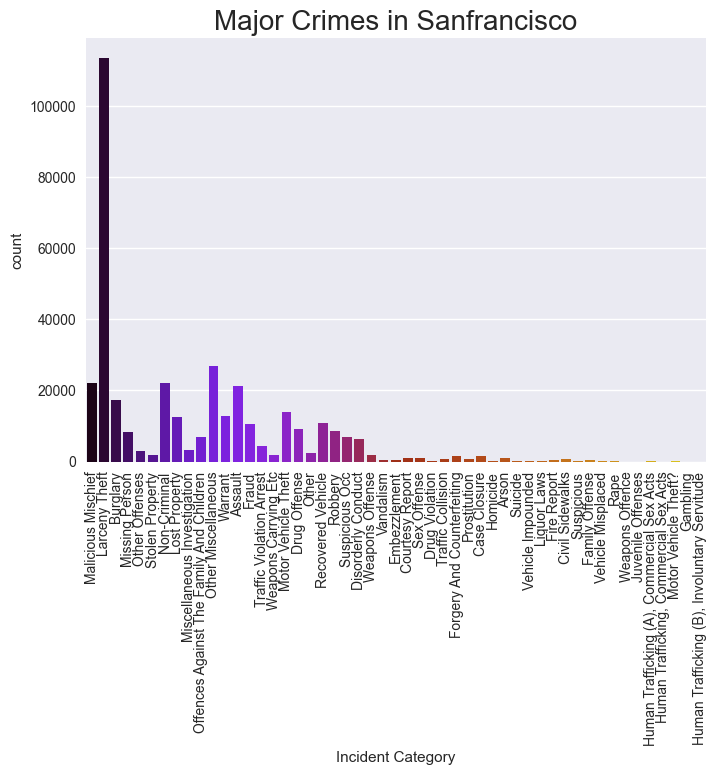

In [76]:
#Plot of the most frequent crimes that took place in SF
plt.rcParams['figure.figsize'] = (10, 9)
plt.style.use('seaborn')
color = plt.cm.ocean(np.linspace(0, 1, 15))
sns.countplot(data['Incident Category'], palette = 'gnuplot')

plt.title('Major Crimes in Sanfrancisco', fontweight = 30, fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

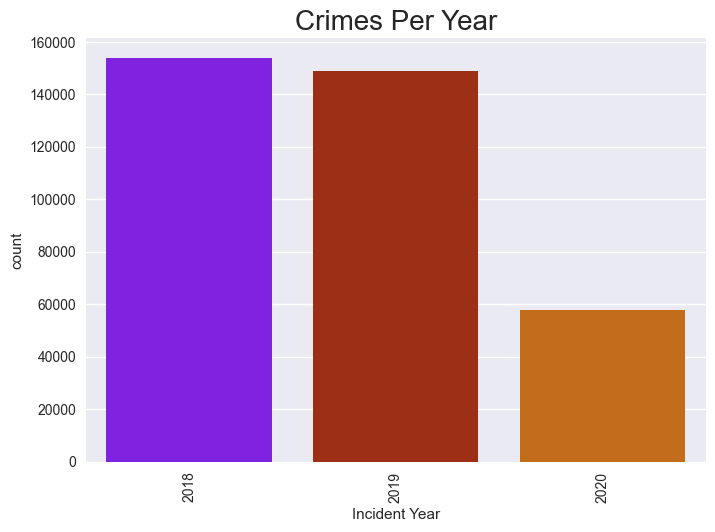

In [85]:
#Plot of crimes per year 
plt.rcParams['figure.figsize'] = (20, 9)
plt.style.use('seaborn')

sns.countplot(data['Incident Year'], palette = 'gnuplot')

plt.title('Crimes Per Year', fontweight = 30, fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

In [9]:
#Creates column for the incident month
data['Month'] = pd.DatetimeIndex(data['Incident Datetime']).month

In [10]:
#Creates column for the incident hour
data['Hour'] = pd.DatetimeIndex(data['Incident Datetime']).hour

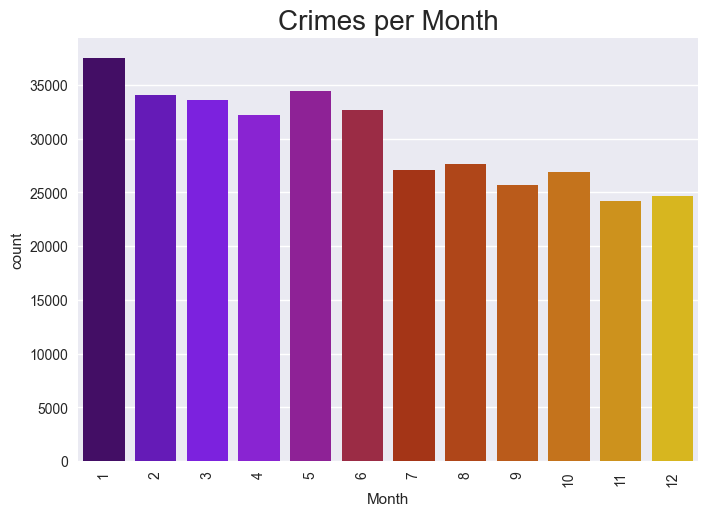

In [86]:
#Plotting crimes per month
plt.rcParams['figure.figsize'] = (20, 9)
plt.style.use('seaborn')

sns.countplot(data['Month'], palette = 'gnuplot')

plt.title('Crimes per Month', fontweight = 30, fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

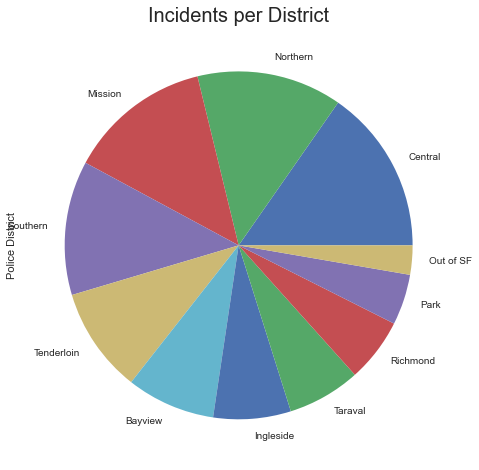

In [12]:
# Regions with count of crimes

plt.style.use('seaborn')


data['Police District'].value_counts().head(15).plot.pie(figsize = (15, 8))

plt.title('Incidents per District',fontsize = 20)

plt.xticks(rotation = 90)
plt.show()

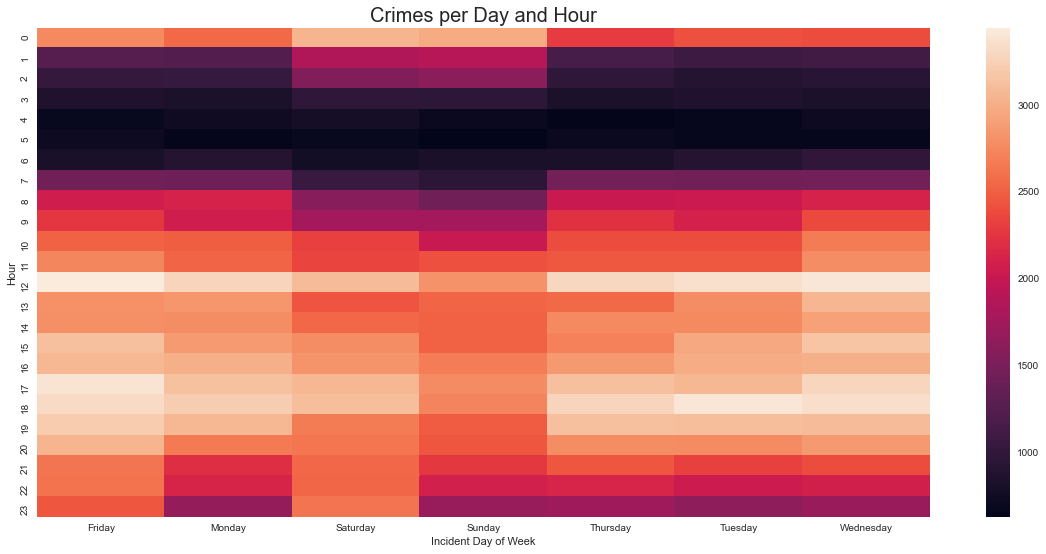

In [28]:
# Heatmap showcasing the amount of crimes per day and hour 
sf_heatmap = pd.crosstab(data['Hour'],data['Incident Day of Week'])
plt.rcParams['figure.figsize'] = (20, 9)
plt.title('Crimes per Day and Hour',fontsize = 20)
sns.heatmap(sf_heatmap)

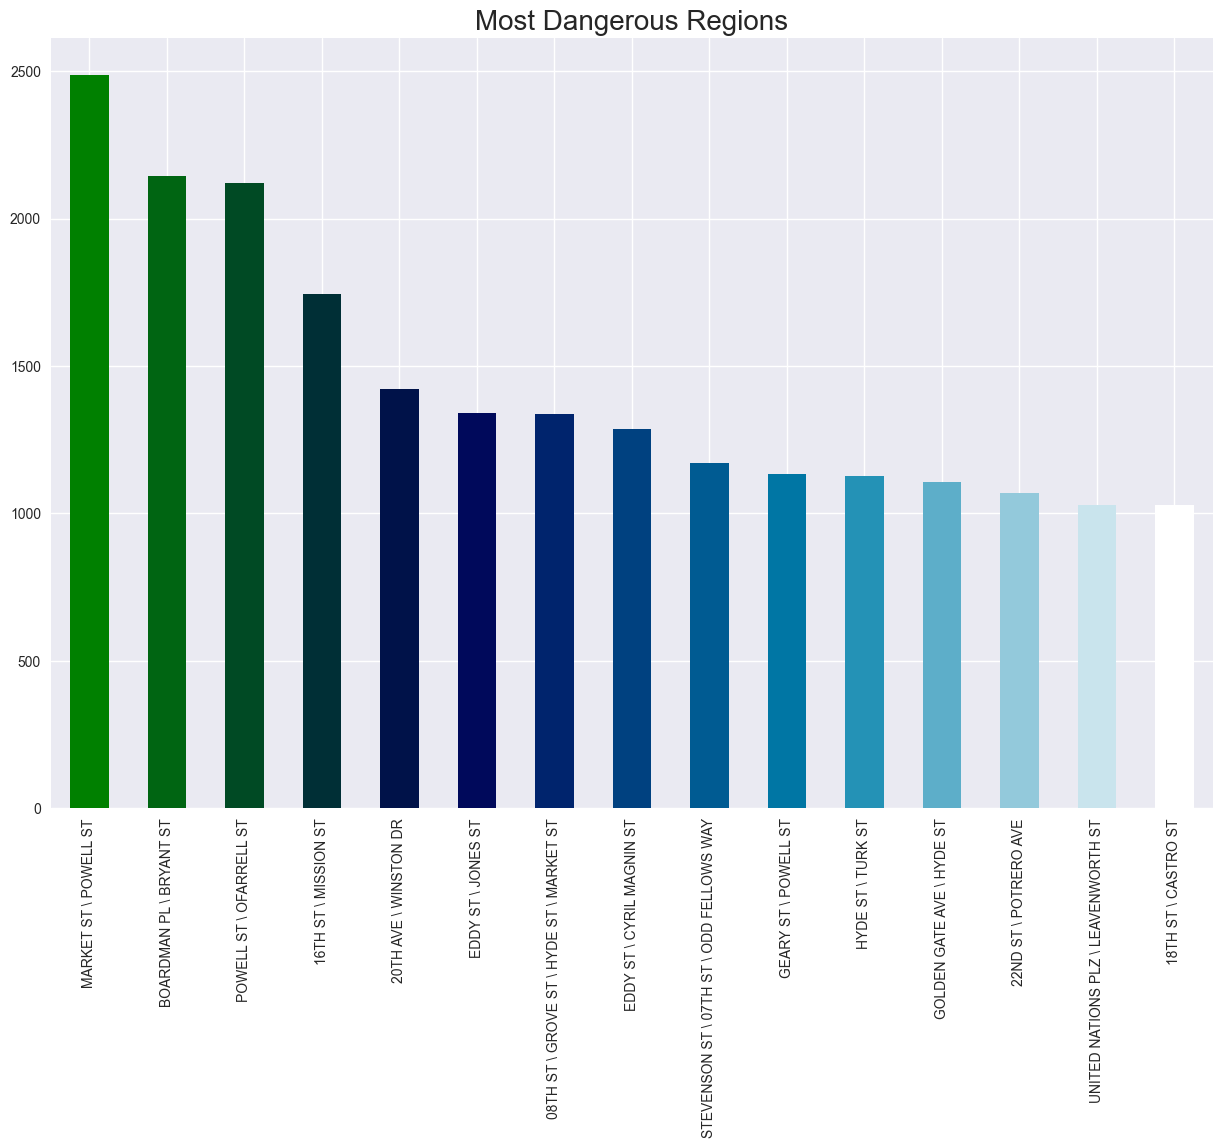

In [83]:
#Intersections in which crimes occured most frequently
plt.rcParams['figure.figsize'] = (20, 9)
plt.style.use('seaborn')

color = plt.cm.ocean(np.linspace(0, 1, 15))
data['Intersection'].value_counts().head(15).plot.bar(color = color, figsize = (15, 10))

plt.title('Most Dangerous Intersections',fontsize = 20)

plt.xticks(rotation = 90)
plt.show()

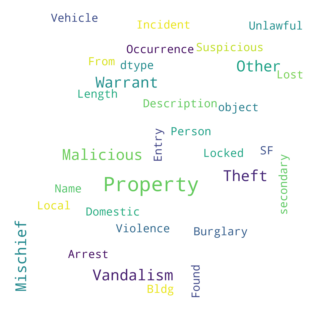

In [18]:
#Generate wordcloud of most common words used in crime descriptions
text = str(data['Incident Description'])
stopwords = set(STOPWORDS)



# Create and generate a word cloud image:
wordcloud = WordCloud(stopwords=stopwords,max_font_size=100, max_words=10000, background_color="white", width=1500, height=1500).generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

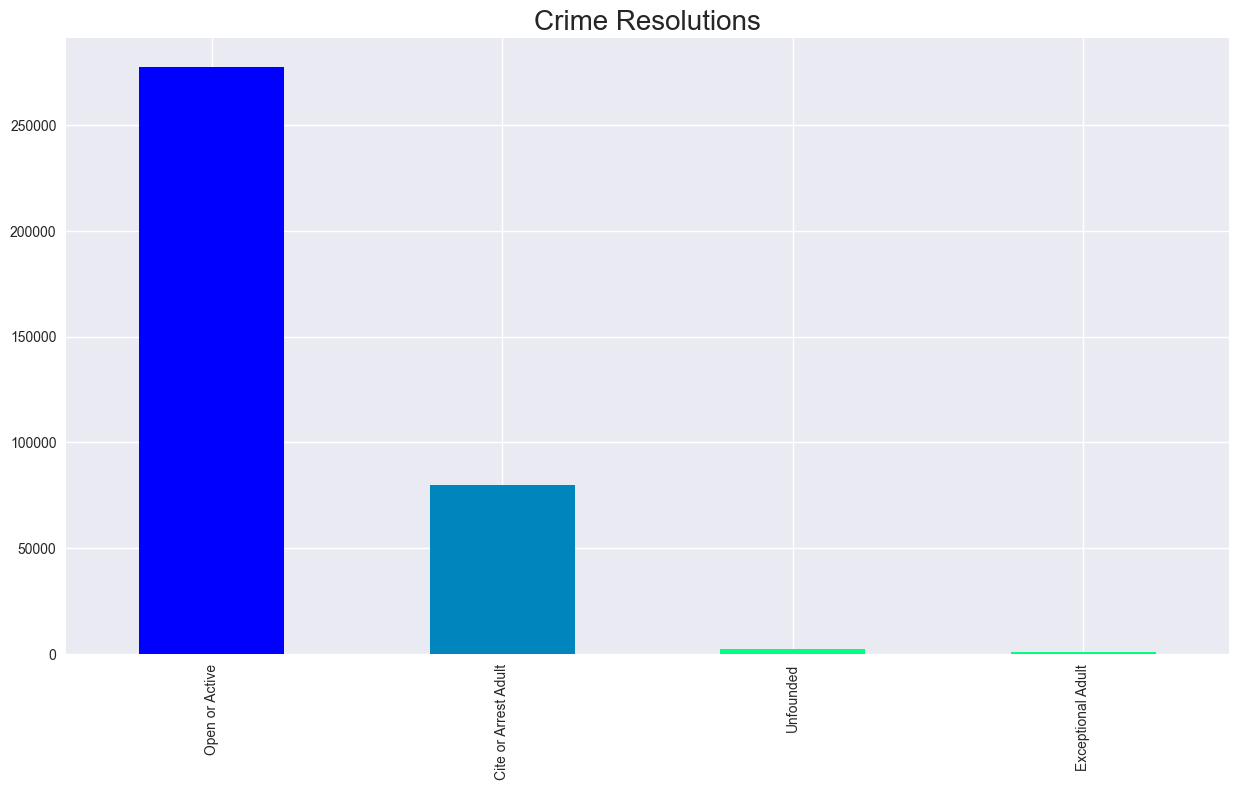

In [84]:
#Status of Incidents 
plt.style.use('seaborn')

color = plt.cm.winter(np.linspace(0, 10, 20))
data['Resolution'].value_counts().plot.bar(color = color, figsize = (15, 8))

plt.title('Crime Resolutions',fontsize = 20)
plt.xticks(rotation = 90)
plt.show()